### Average over multiple runs - Method 2 - Phase noise only
Plot the emittance growth in the presence of phase noise - PN. The simulation for each set of parameters is repeated multiple times. The slope of the emittance growth for each run was extracted via linear fit. Then the mean and the standard deviation of these slopes were computed over all turns. The normalised emittance is used here.

In [1]:
import sys
sys.path.append('../../')
from utils.bunchLengthConversions import *
from utils.cmptTheoreticalEmitGrowth import *
from utils.NoiseConversions import *
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting paramerters

In [2]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [5]:
n_runs = 3 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

In [6]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/tbt_from_GPUs/globalCC2deg90_1MV_realNoise_PNCoast3PartC_ayy0_axy0_1e5turns_Nb20k_nob3b5b7_QpyQpx0/'
name_template = 'tbt_'
noise_type = 'PN' # 'PN', 'AN', 'BOTH'

In [7]:
# phase noise
ex_dict_pn = {} # type: dictionary
ey_dict_pn = {}
for run in range(n_runs):
    print(run)
    temp_name = '{}'.format(run) # the suffix of the name of the current study
    # A. load the turn by turn data in a dictionary
    temp_dict_pn = pickle.load( open( path_to_data+name_template+temp_name+'.pkl', "rb" ) )
    # B. Create a different list for each run and save the emittance values
    ex_dict_pn[temp_name] = temp_dict_pn['neps_x'] # PΝ
    ey_dict_pn[temp_name] = temp_dict_pn['neps_y']

0
1
2


#### 2A) Plot the emittance evolution for every run
In the command plot choose which one of the dictionaries:
- ex_dict_pn[temp_name] 
- ey_dict_pn[temp_name]

you want to study.

**There is an emittance blow up during the 1st 200 turns, when the CC voltage is ramping up. These turns are excpluded from the analysis performed below**

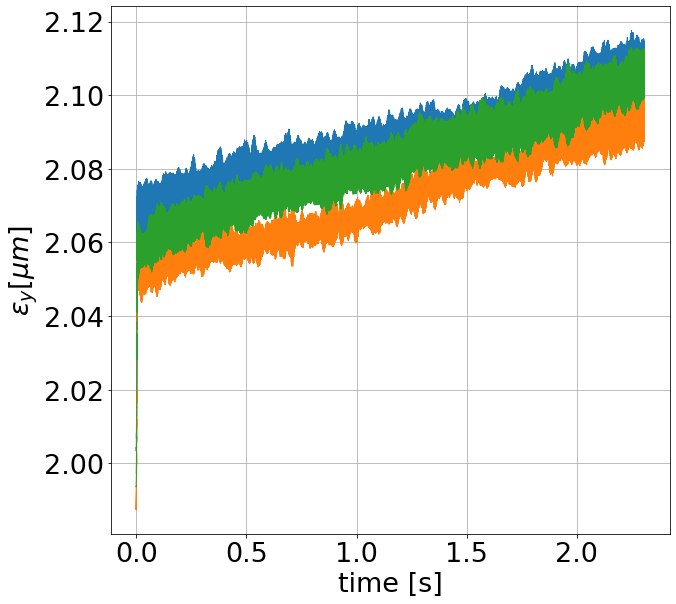

In [8]:
for run in range(n_runs):
    temp_name = '{}'.format(run) # the suffix of the name of the current study
    plt.plot(time, np.array(ey_dict_pn[temp_name])*1e6, c='C{}'.format(run))
    plt.plot(2,2,  label = 'run {}'.format(run+1), c='C{}'.format(run), linewidth = 3) 
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y [\mu m]$')
    #plt.legend(loc=0)s
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_10runs.png')

### 3) Remove the first 200 elements from every run

In [9]:
ex_dict = {}
ey_dict = {}
for run in range(n_runs):
    temp_name = '{}'.format(run) # the suffix of the name of the current study
    ex_dict[temp_name] = ex_dict_pn[temp_name][200:]
    ey_dict[temp_name] = ey_dict_pn[temp_name][200:]
    time_new = time[200:]

### 4) Plot the emittance growth normalised with the initial emittance value for every run for easier comparison

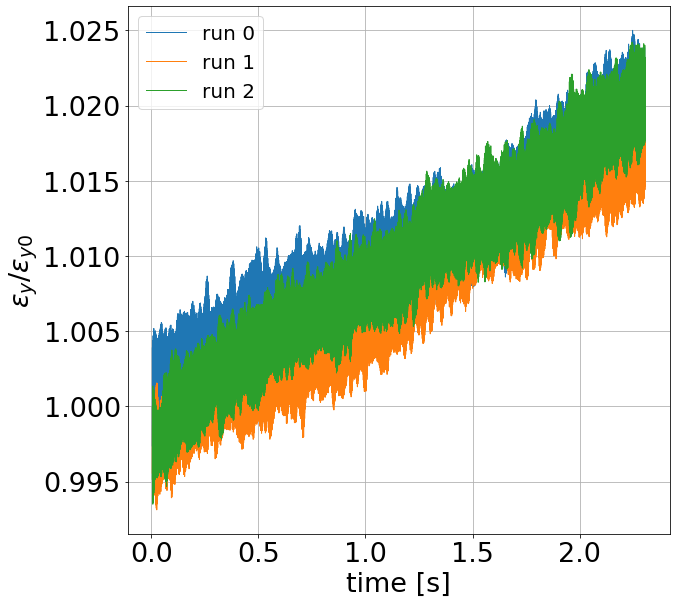

In [10]:
#labels = ['modulation amplitude = 200 ps', 'modulation amplitude = 175 ps', 'modulation amplitude = 150 ps', 'modulation amplitude = 100 ps' ]
#labels = ['0 deg', '30 deg', '60 deg', '90 deg']
for run in range(n_runs):
    temp_name = '{}'.format(run) # the suffix of the name of the current study
    plt.plot(time_new, np.array(ey_dict[temp_name])/ey_dict[temp_name][0], c='C{}'.format(run), label='run {}'.format(run))
    #plt.plot(time_new, np.array(ey_dict[temp_name])/ey_dict[temp_name][0], c='C{}'.format(run), label=labels[run])
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y / \epsilon_{y0} $')
plt.legend(loc=0)
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'V_emit_norm_270GeV_SPS_noCC_PN1e-8_VRF5_088MV_20kNb_{turns}turns_{n_runs}runs.png')

### 7a) Calculate the emittance growth for each run rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only and phase noise only, if otherwise choose the apropriate dictionary from step 1.

    - ex_dict_pn[temp_name] 
    - ey_dict_pn[temp_name]


In [11]:
m_dict = []
b_dict = []
err_dict = []
for run in range(n_runs):
    temp_name = '{}'.format(run)
    # linear fit
    [m, b], cov = np.polyfit(time_new, ey_dict[temp_name], 1, cov=True)
    # compute the error of the gradient of the fit slope
    err= np.sqrt(np.diag(cov))
    m_dict.append(m)
    b_dict.append(b)
    err_dict.append(err)

/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


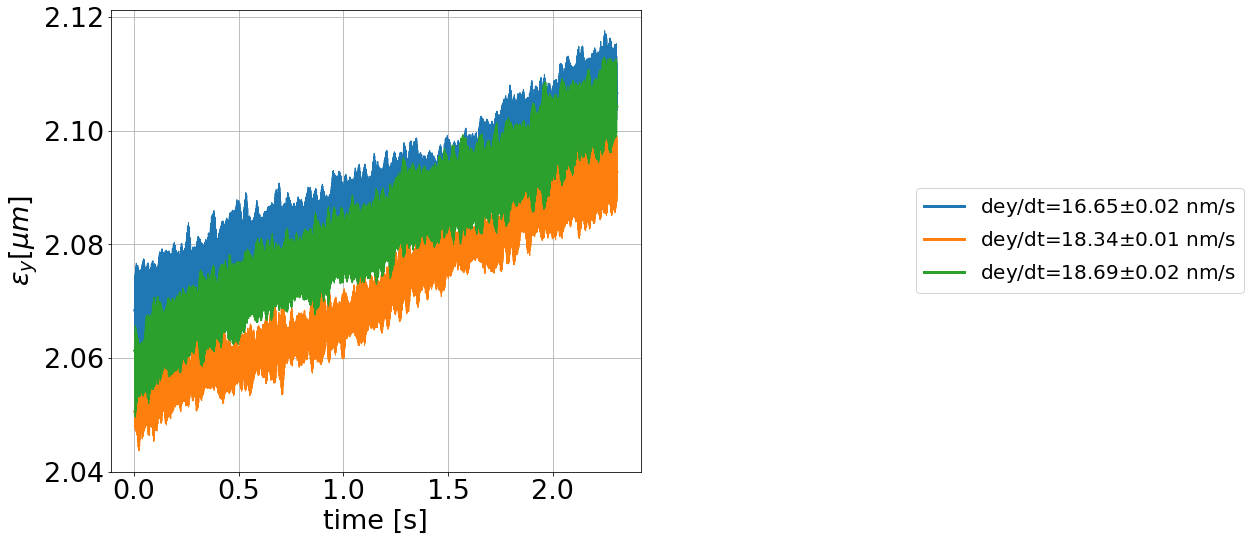

In [12]:
for run in range(n_runs):
    temp_name = '{}'.format(run)
    plt.plot(time_new, np.array(ey_dict[temp_name])*1e6, c='C{}'.format(run))
    plt.plot(time_new, (m_dict[run]*time_new+b_dict[run])*1e6, c = 'C{}'.format(run), label='dey/dt={0:.2f}'.format(m_dict[run]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict[run][0]*1e9), linewidth = 3)
    
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y [\mu m]$')
    #plt.legend(loc=0)
    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'V_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_{turns}turns_{n_runs}runs.png')

/home/natalia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  # This is added back by InteractiveShellApp.init_path()


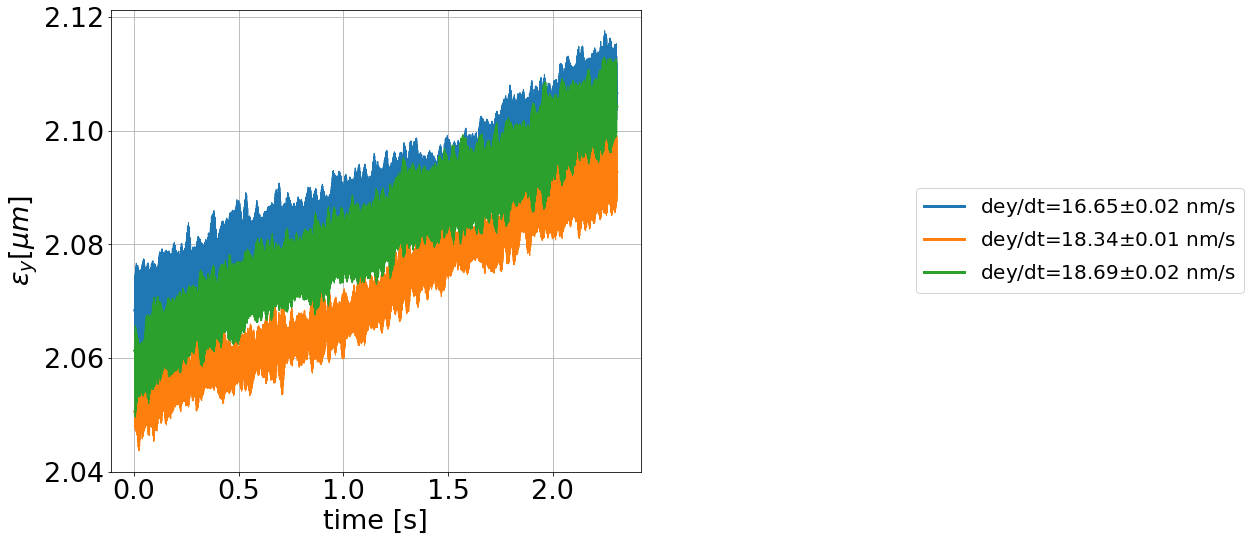

In [13]:
for run in range(n_runs):
    temp_name = '{}'.format(run)
    plt.plot(time_new, np.array(ey_dict[temp_name])*1e6, c='C{}'.format(run))
    plt.plot(time_new, (m_dict[run]*time_new+b_dict[run])*1e6, c = 'C{}'.format(run), label='dey/dt={0:.2f}'.format(m_dict[run]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict[run][0]*1e9), linewidth = 3)
    
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y [\mu m]$')
    #plt.legend(loc=0)
    plt.legend(loc='center left', bbox_to_anchor=(1.5, 0.5))
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig(f'V_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_{turns}turns_{n_runs}runs.png')

### 7b) Plot the normalised,  with the intiial values, emittance evolution along the linear fit

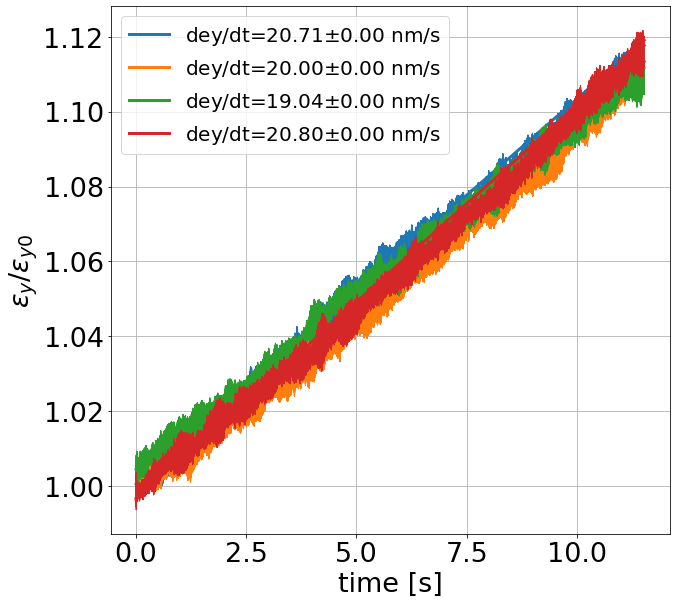

In [35]:
for run in range(n_runs):
    temp_name = '{}'.format(run) # the suffix of the name of the current study
    plt.plot(time[200:], np.array(ey_dict_pn[temp_name][200:])/ey_dict_pn[temp_name][200], c='C{}'.format(run))
    
    plt.plot(time[200:], (m_dict[run]/ey_dict_pn[temp_name][0]*time[200:]+b_dict[run]/ey_dict_pn[temp_name][200]), c = 'C{}'.format(run), label='dey/dt={0:.2f}'.format(m_dict[run]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict[run][0]*1e9), linewidth = 3)
    
    
    #plt.plot(2,2,  label = 'run {}'.format(run+1), c='C{}'.format(run), linewidth = 3) 
    plt.xlabel('time [s]')
    plt.ylabel(r'$\epsilon_y / \epsilon_{y0} $')
    plt.legend(loc=0)
plt.grid()    
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emit_norm_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_{}runs_allruns.png'.format(n_runs))

### 8) Compute the theoretically expected rate
- Define the machine and beam parameters
- Define the levels of noise for A
- Compute the expected rate from the functions in '../utils/my_functions.py'
- Define the colors according to the type of the study

In [36]:
# Machine parameters
betay = 73 # 73 m at CC2, 76 m at CC1
Vcc = 1e6# V
frev = 43.45e3 # Hz
Eb = 270e9 # eV
beta_0 = 0.999999
gamma_0 = 287.7
sigma_z = 0.155 # m
f_CC = 400.789e6 # CC frequency in Hz
clight = 299792458 # m/s
#A_phase = 1e-8 # rms kick in the simulation of the phase noise
#A_amplitude = 0 # rms kick in the simulation of the amplitude noise
#scale_factor = Eb/Vcc # scaling factor to rms noise, σ
# Compute the PSD in rad^2/Hz and V^2/Hz
#PSD_phi = (A_phase * scale_factor)**2/frev # rad^2/Hz
PSD_phi = 1.42e-10 # rad^2/Hz
#PSD_phi = 1.4e-10 
PSD_A = 3.99e-11 #(A_amplitude * scale_factor)**2/frev # V^2/Hz
print(PSD_phi, PSD_A)

1.42e-10 3.99e-11


In [37]:
# Compute the correction factor due to the bunch length
sigma_phi = bunch_length_m_to_rad(sigma_z, clight, f_CC)
CDeltaphi = cmpt_bunch_length_correction_factor(sigma_phi, 'PN')
CDeltaA = cmpt_bunch_length_correction_factor(sigma_phi, 'AN')
print('CDeltaPhi = {}, CDeltaA = {}'.format(CDeltaphi, CDeltaA))

if noise_type == 'PN':
    expected_growth = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C0'
    fill_bewtween_color = 'lightblue'
elif noise_type == 'AN':
    expected_growth = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    my_color = 'C1'
    fill_bewtween_color = 'moccasin'
else:
    my_color = 'C2'
    expected_growth_1 = emit_growth_phase_noise(betay, Vcc, frev, Eb, CDeltaphi, PSD_phi, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth_2 = emit_growth_amplitude_noise(betay, Vcc, frev, Eb, CDeltaA, PSD_A, one_sided_psd=False)*beta_0*gamma_0 # m/s
    expected_growth = expected_growth_1 + expected_growth_2

print('expected growth = {} nm/s'.format(expected_growth*1e9))

CDeltaPhi = 0.5168486015622045, CDeltaA = 0.24157569921889774
expected growth = 19.958873023196848 nm/s


In [38]:
expected_growth*time_new*1e6

array([9.20275611e-05, 9.24876989e-05, 9.29478367e-05, ...,
       2.30067522e-01, 2.30067982e-01, 2.30068443e-01])

### 9) Plot the normalised,  with the intial values, emittance evolution along the linear fit vs the expected growth

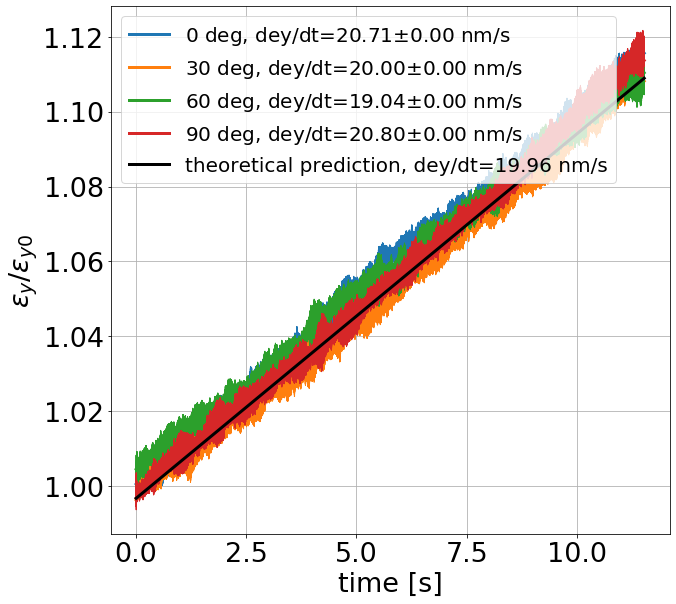

In [39]:
#labels = ['200 ps', '175 ps', '150 ps', '100 ps' ]
#labels = ['0 deg', '30 deg', '60 deg', '90 deg']
for run in range(n_runs):
    temp_name = '{}'.format(run) # the suffix of the name of the current study
    # Plot all the points
    plt.plot(time_new, np.array(ey_dict[temp_name])/ey_dict[temp_name][0], c='C{}'.format(run))
    # Plot the fits
    plt.plot(time_new, (m_dict[run]/ey_dict[temp_name][0]*time_new+b_dict[run]/ey_dict[temp_name][0]), c = 'C{}'.format(run), label=labels[run]+', dey/dt={0:.2f}'.format(m_dict[run]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict[run][0]*1e9), linewidth = 3)
# Plot the theoretically computed growth
plt.plot(time_new, expected_growth/ey_dict[temp_name][0]*time_new+b_dict[run]/ey_dict[temp_name][0], c='k', linewidth=3, label='theoretical prediction, dey/dt={:.2f} nm/s'.format(expected_growth*1e9))

    
    
#plt.plot(2,2,  label = 'run {}'.format(run+1), c='C{}'.format(run), linewidth = 3) 
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y / \epsilon_{y0} $')
plt.legend(loc=0)
plt.grid()    
plt.tight_layout()
savefig = True
if savefig:
    plt.savefig(f'dey_270GeV_SPS_globalCCscheme_PN_Coast3Setting3VRF5_088MV_20kNb_{turns}turns_{n_runs}runs_allruns.png')

#### 8) Compute the mean and the standard deviation of these slopes were computed over all turns.

In [40]:
growth_rate = np.mean(m_dict)
standard_deviation = np.std(m_dict)
print(standard_deviation/np.sqrt(n_runs))
errors = 0
for run in range(n_runs):
    errors = errors+ err_dict[run][0]**2    
growth_rate_error = np.sqrt(errors)/n_runs
print(growth_rate_error*1e9)
print(growth_rate*1e9)
print(standard_deviation)

3.5283326675587927e-10
0.0010079026803912336
20.136538143628904
7.056665335117585e-10


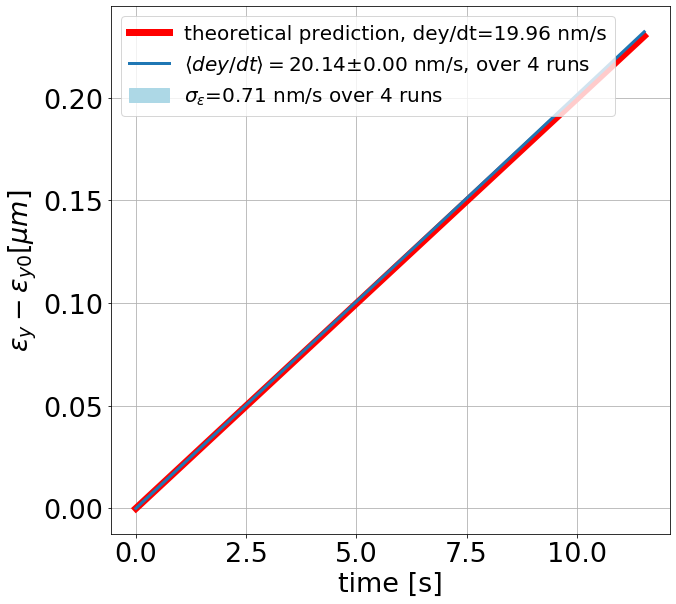

In [41]:
# expected slope from analytical calculations
plt.plot(time, (expected_growth*time)*1e6, c='r', linewidth=7, label='theoretical prediction, dey/dt={:.2f} nm/s'.format(expected_growth*1e9))
# emittance values obtained from the simulation averaged over runs
plt.plot(time, growth_rate*time*1e6, c=my_color, linewidth=3, label=r'$\langle dey/dt  \rangle={0:.2f}$'.format(growth_rate*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(growth_rate_error*1e9)+', over {} runs'.format(n_runs))

plt.fill_between(time, growth_rate*time*1e6 - standard_deviation*1e6, growth_rate*time*1e6 + standard_deviation*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon}$'+'={:.2f} nm/s'.format(standard_deviation*1e9)+ ' over {} runs'.format(n_runs))

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y - \epsilon_{y0} [\mu m]$')
plt.legend(loc=0)
plt.grid()
#plt.ylim(0, 0.08)
#plt.ylim(0, 0.6)

plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emit_growth_rate_substract_initial_emittance_270GeV_SPS_{}_PN1e-8_VRF2_37MV_1e5Nb_5e5turns_mean{}run_fill_between_method2.png'.format(noise_type, n_runs))

In [19]:
print('The emittance growth rate is computed: {}'.format(growth_rate*1e9)+'+-'+'{} nm/s'.format(standard_deviation*1e9))

The emittance growth rate is computed: 23.138081866236902+-1.8639857584091055 nm/s


In [47]:
print('The emittance growth rate is computed: {}'.format(growth_rate*1e9)+'+-'+'{} nm/s'.format(standard_deviation*1e9))

The emittance growth rate is computed: 24.623882456111495+-0.48609811081392706 nm/s
